<a href="https://colab.research.google.com/github/KajetanFrackowiak/tensorflow_fundamentals/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


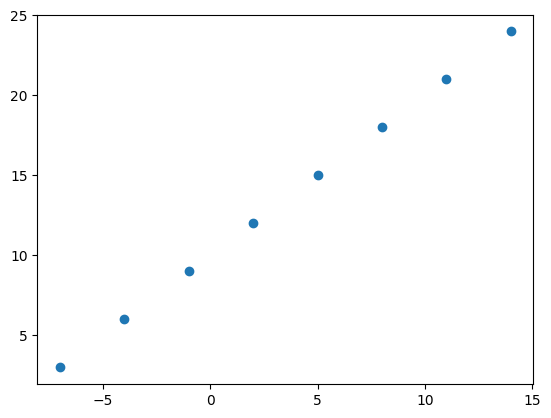

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shape

In [4]:
# Create a demo tensor for our housing price prediciton problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X[0].ndim

0

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

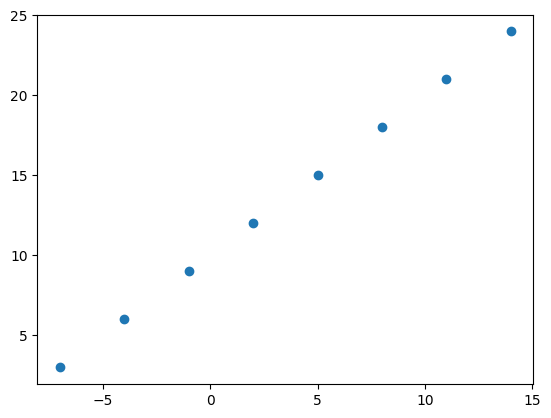

In [10]:
plt.scatter(X, y)

# Modelling with TensorFlow

**1. Creating a model**

**2. Compiling a model**

**3. Fitting a model**

In [11]:
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))  # Specify input_shape for the first layer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 533ms/step - loss: 19.3290 - mae: 19.3290
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 19.0477 - mae: 19.0477
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 18.7665 - mae: 18.7665
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 18.4852 - mae: 18.4852
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 18.2040 - mae: 18.2040


In [12]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 124ms/step


array([[-16.803358]], dtype=float32)

In [13]:
y_pred + 11

array([[-5.803358]], dtype=float32)

# Improving our model
We can improve our model. by altering the steps we took to create a model.

**1. Creating a model**

**2. Compiling a model**

**3. Fitting a model**

In [14]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 551ms/step - loss: 14.3952 - mae: 14.3952
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.3907 - mae: 14.3907
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 14.3862 - mae: 14.3862
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.3817 - mae: 14.3817
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3772 - mae: 14.3772
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.3727 - mae: 14.3727
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3682 - mae: 14.3682
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3637 - mae: 14.3637
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.3592 - mae: 14.3592
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3547 - mae: 14.3547
Epoch 11/100
1/1 [==============================

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 54ms/step


array([[-2.5481257]], dtype=float32)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),

    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# 3.
model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 536ms/step - loss: 14.2021 - mae: 14.2021
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 13.2552 - mae: 13.2552
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 12.3125 - mae: 12.3125
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 11.3674 - mae: 11.3674
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 10.4112 - mae: 10.4112
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 9.4364 - mae: 9.4364
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 8.4367 - mae: 8.4367
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 7.4063 - mae: 7.4063
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 6.6827 - mae: 6.6827
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 7.0474 - mae: 7.0474
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 7.544

In [18]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
X.ndim, y.ndim

(1, 1)

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 59ms/step


array([[26.757095]], dtype=float32)

In [21]:
# Common ways to improve a deep model:
# Adding layers
# Increase the number of hidden units
# Change the activation functions
# Change the optimization function
# Change the learning rate
# Fitting on more data
# Fitting for longer (more epochs)

# Evaluting a model

**In practice, a typical workflow you'll go through when building neural netwroks:**

**Build a model -> fit it -> evaluate it -> tweak a model->
fit it -> evaluate it -> tweak a model ->
fit it -> evaluate it ...**

When it comes to evaluation.. there are 3 words you should memorize:

**Visualize, visualize, visualize**

**It's good idea to visualize:**

**The data**

**The model itself**

**The training of a model - how does a model perform while it learns?**

**The predictions of the modle**

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

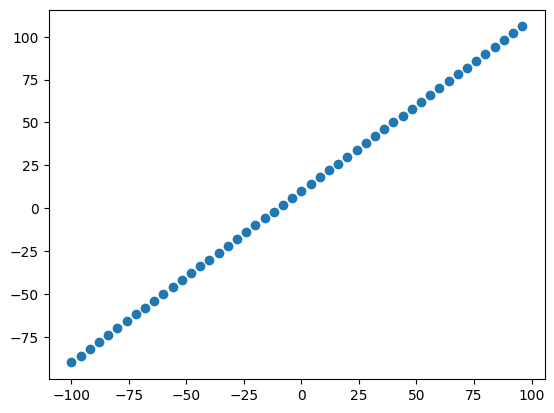

In [24]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

# The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data availale.

**Generalization** = The ability for a machine learning model to perform well on data it hasn't seen before

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40]  # first 40 are training samples (80%)
y_train = y[:40]

X_test = X[40:]  # last 10 are testing samples (20%)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

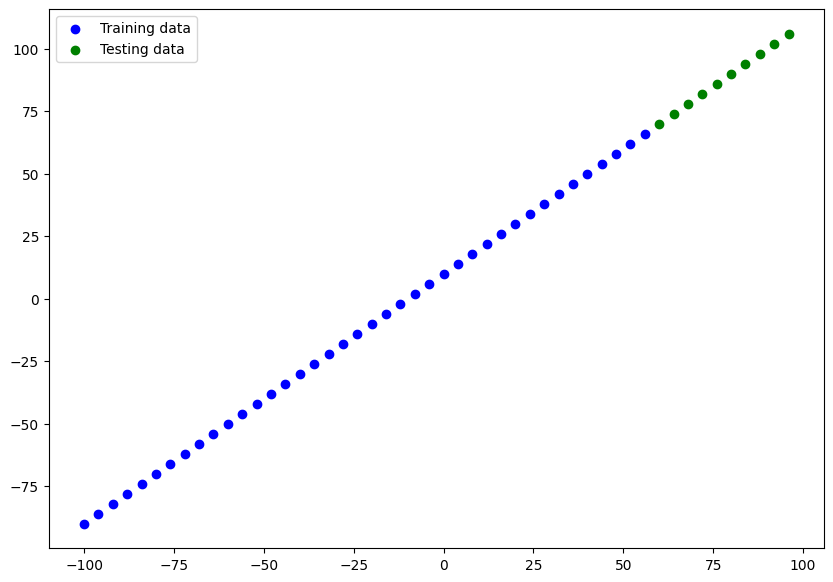

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [28]:
# # Let's have a look at how to build a neural network for our data

# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, input_shape)
# ])

# # 2.Compile the model
# model.compile(loss=tf.keras.losses.mae,
#              optimizer=tf.keras.optimizers.SGD(),
#              metrics="mae")

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [29]:
def reset_model():
    # Clear the prevous session
    tf.keras.backend.clear_session()

# Visualizing

In [30]:
reset_model()

In [31]:
# Let's create a model which builds automatically by defining the input_shape arguent in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resource:** For a more in-depth overview of the trainable parameters whithin a layer, check out MIT's introduction to deep learning video.

**Exercise:** Try playing around with the number ofidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summar().

 ### Let's fit our model to the training data

In [33]:
 model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 37.3845 - mae: 37.3845
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 23.3747 - mae: 23.3747
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.0691 - mae: 29.0691
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 25.3237 - mae: 25.3237
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 13.3958 - mae: 13.3958
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7969 - mae: 10.7969
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.7620 - mae: 11.7620
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7695 - mae: 10.7695
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 36.5095 - mae: 36.5095
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 24.3314 - mae: 24.3314
Epoch 11/100
2/2 [==============================] - 0s 6ms/

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


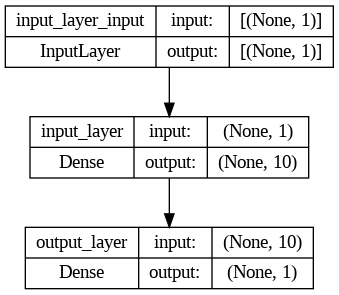

In [35]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model=model, show_shapes=True)

In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualizing our model predictions
To visualize predictions, it's a good idea to plot them against the groud truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred

In [37]:
# MAke some predicitons
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 81ms/step


array([[ 70.37859 ],
       [ 74.95622 ],
       [ 79.53387 ],
       [ 84.111496],
       [ 88.689125],
       [ 93.26676 ],
       [ 97.844406],
       [102.422035],
       [106.99967 ],
       [111.57729 ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # PLot model's predicting in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

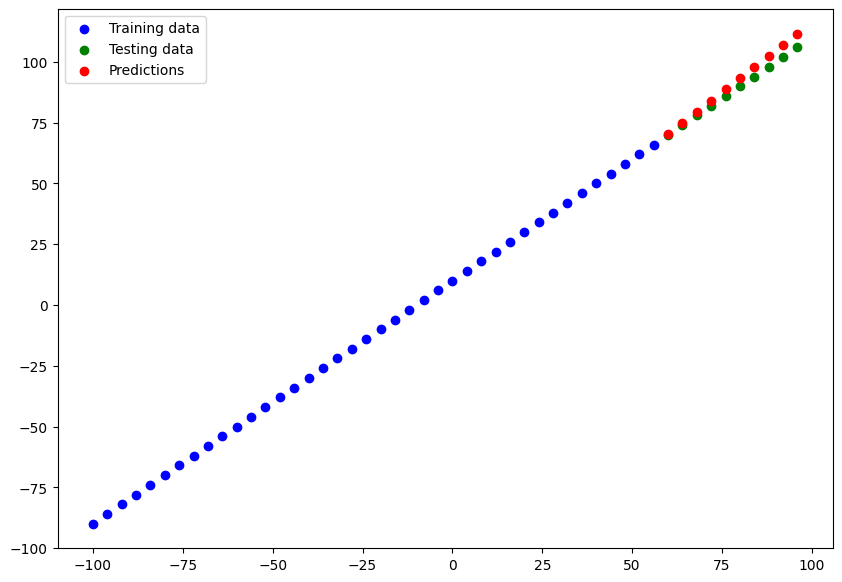

In [40]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how rong is each of my model's predictions"
* MSE - mean square, "square the average errors:

In [41]:
# Evalute the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 131ms/step - loss: 2.9779 - mae: 2.9779


[2.9779486656188965, 2.9779486656188965]

In [42]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.697124, 14.226267, 11.786453, 10.377701, 10.      , 10.653353,
       12.337763, 15.137629, 18.999672, 23.577293], dtype=float32)>

In [43]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.37859 ],
       [ 74.95622 ],
       [ 79.53387 ],
       [ 84.111496],
       [ 88.689125],
       [ 93.26676 ],
       [ 97.844406],
       [102.422035],
       [106.99967 ],
       [111.57729 ]], dtype=float32)>

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.37859 ,  74.95622 ,  79.53387 ,  84.111496,  88.689125,
        93.26676 ,  97.844406, 102.422035, 106.99967 , 111.57729 ],
      dtype=float32)>

In [46]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.9779472>

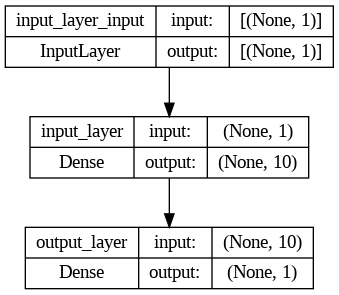

In [47]:

plot_model(model=model, show_shapes=True)

In [48]:
# Calcualte the Mean Square Error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                            y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.620875>

In [49]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

# Running experiments to improve
Build a model -> fit it -> evaluate it -> tweak it -> fit it
-> evaluate it -> tweak it -> fit it -> evaluate it...

1. Get more data - get more examples for your model to train
on (more opportunities to learn patterns or relationships
between features and labels).
2. Make your model larger (using a more complex model( - this mmight come in the form of more layers or more hidden units
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. model_1 - same as the original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs
4. model_4 - 3 layers, trained for 500 epochs
5. model_5 - 4 layers, trained for 500 epochs

In [66]:
X_train.ndim, y_train.ndim

(2, 2)

In [67]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 77.7415 - mae: 77.7415
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 42.3829 - mae: 42.3829
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2195 - mae: 10.2195
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4763 - mae: 9.4763
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3676 - mae: 10.3676
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6096 - mae: 9.6096
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7233 - mae: 8.7233
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0784 - mae: 9.0784
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.0928 - mae: 19.0928
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3198 - mae: 10.3198
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

1/1 [==============================] - 0s 45ms/step


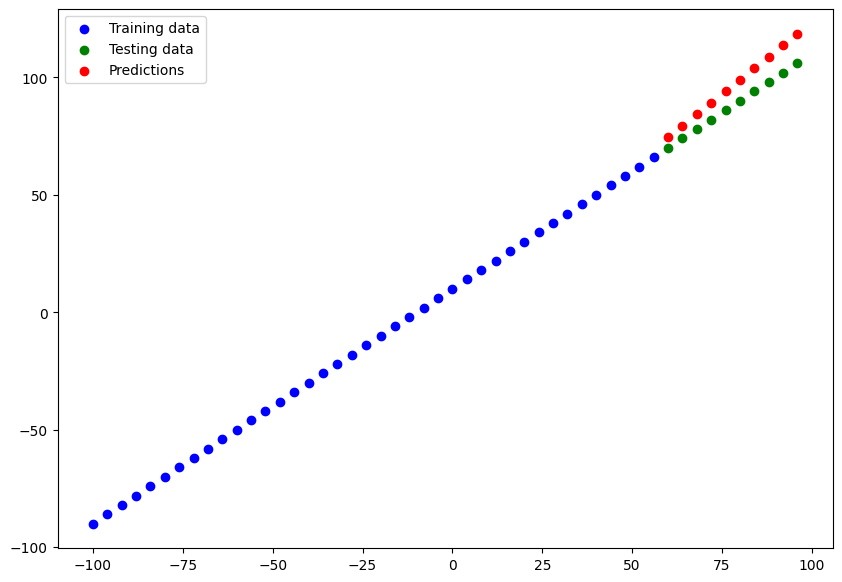

In [68]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [69]:
%who -p function

mae	 mse	 plot_model	 plot_predictions	 reset_model	 


In [70]:
help(plot_predictions)

Help on function plot_predictions in module __main__:

plot_predictions(train_data=<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>, train_labels=<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66], dtype=int32)>, test_data=<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>, test_labels=<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>, predictions=array([[ 70.37859 ],
       

In [71]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.562898>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.806656>)

In [72]:
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 60.1016 - mse: 5237.5615
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 41.0496 - mse: 2393.1099
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 43.9861 - mse: 2964.1577
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 30.1047 - mse: 1331.4429
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 16.7306 - mse: 371.7581
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.3696 - mse: 145.0728
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.4506 - mse: 202.0699
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0559 - mse: 144.3518
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 39.4131 - mse: 2423.9607
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 26.9420 - mse: 1020.7150
Epoch 11/100
2/2 [=======================

1/1 [==============================] - 0s 50ms/step


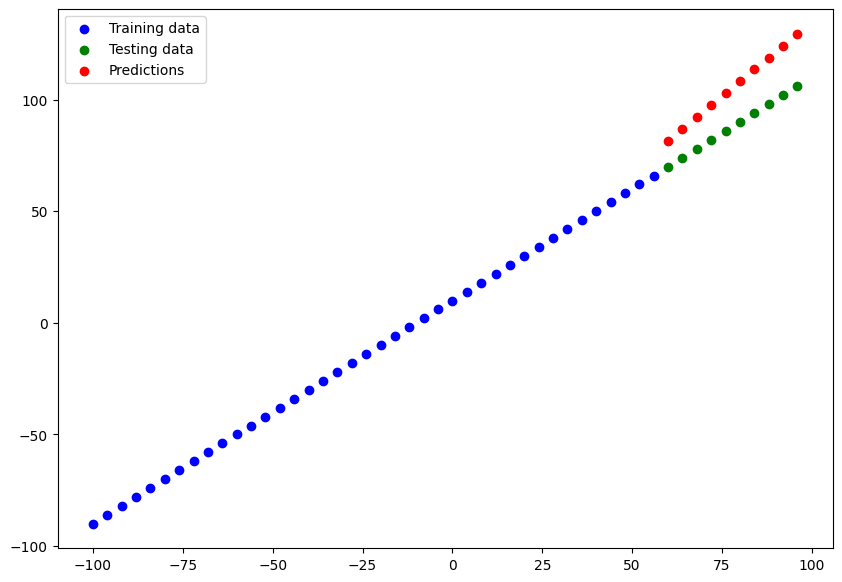

In [73]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [74]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=17.551708>,
 <tf.Tensor: shape=(), dtype=float32, numpy=322.53882>)

In [76]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 48.0510 - mae: 48.0510
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 34.4428 - mae: 34.4428
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 12.7383 - mae: 12.7383
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 13.2522 - mae: 13.2522
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 11.4726 - mae: 11.4726
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 16.6917 - mae: 16.6917
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 22.6771 - mae: 22.6771
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 7.5883 - mae: 7.5883
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 34.9159 - mae: 34.9159
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 18.9455 - mae: 18.9455
Epoch 11/500
2/2 [==============================] - 0s 7ms/s

1/1 [==============================] - 0s 54ms/step


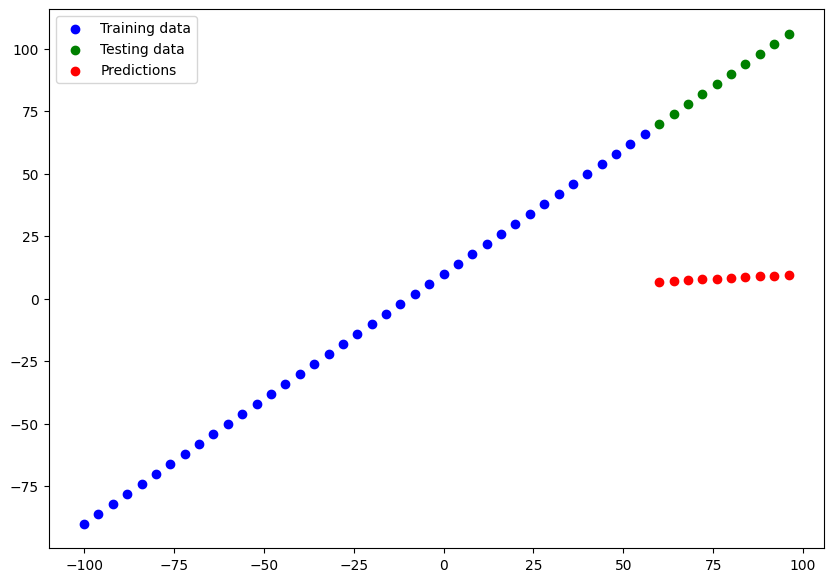

In [77]:
y_preds_3 =  model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [78]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=79.76282>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6474.8726>)

## Comparing the results of our experiments



In [81]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.562898,79.806656
1,model_2,17.551708,322.538818
2,model_3,79.762817,6474.872559


from matplotlib import pyplot as plt
all_results['mae'].plot(kind='hist', bins=20, title='mae')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_results['mse'].plot(kind='hist', bins=20, title='mse')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
all_results.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_results.plot(kind='scatter', x='mae', y='mse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mae']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'mae'}, axis=1)
              .sort_values('mae', ascending=True))
  xs = counted['mae']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = all_results.sort_values('mae', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mae')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mse']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'mse'}, axis=1)
              .sort_values('mse', ascending=True))
  xs = counted['mse']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = all_results.sort_values('mse', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mse')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
all_results['mae'].plot(kind='line', figsize=(8, 4), title='mae')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_results['mse'].plot(kind='line', figsize=(8, 4), title='mse')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_results['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_results, x='mae', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_results['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_results, x='mse', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [83]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_4.fit(X_train, y_train, epochs=150)


Epoch 1/150
2/2 [==============================] - 1s 16ms/step - loss: 55.0385 - mae: 55.0385
Epoch 2/150
2/2 [==============================] - 0s 9ms/step - loss: 37.4163 - mae: 37.4163
Epoch 3/150
2/2 [==============================] - 0s 8ms/step - loss: 12.1242 - mae: 12.1242
Epoch 4/150
2/2 [==============================] - 0s 8ms/step - loss: 38.8758 - mae: 38.8758
Epoch 5/150
2/2 [==============================] - 0s 7ms/step - loss: 34.5304 - mae: 34.5304
Epoch 6/150
2/2 [==============================] - 0s 8ms/step - loss: 21.5384 - mae: 21.5384
Epoch 7/150
2/2 [==============================] - 0s 8ms/step - loss: 34.3879 - mae: 34.3879
Epoch 8/150
2/2 [==============================] - 0s 10ms/step - loss: 21.1344 - mae: 21.1344
Epoch 9/150
2/2 [==============================] - 0s 9ms/step - loss: 38.2509 - mae: 38.2509
Epoch 10/150
2/2 [==============================] - 0s 7ms/step - loss: 22.7502 - mae: 22.7502
Epoch 11/150
2/2 [==============================] - 0s 8m

1/1 [==============================] - 0s 60ms/step


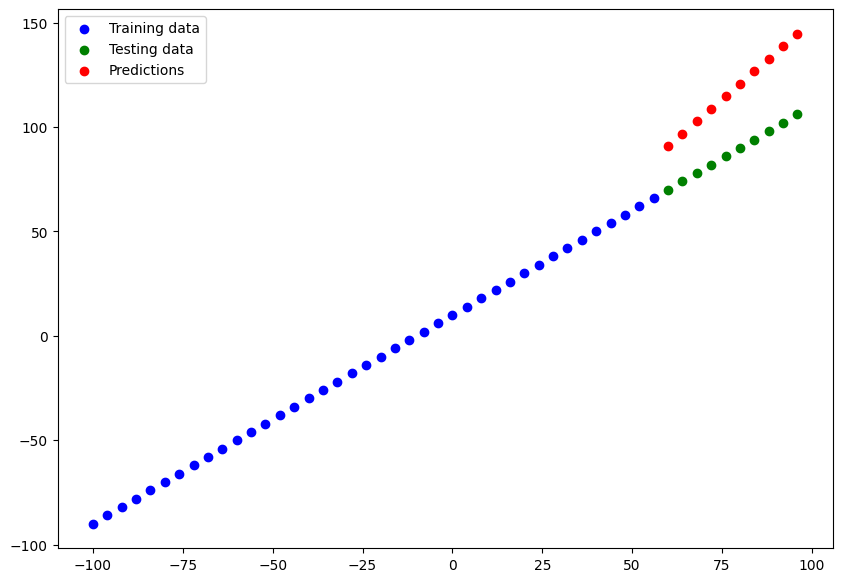

In [85]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_5.fit(X_train, y_train, epochs=150)


Epoch 1/150
2/2 [==============================] - 1s 8ms/step - loss: 53.5343 - mae: 53.5343
Epoch 2/150
2/2 [==============================] - 0s 6ms/step - loss: 48.4637 - mae: 48.4637
Epoch 3/150
2/2 [==============================] - 0s 6ms/step - loss: 43.6488 - mae: 43.6488
Epoch 4/150
2/2 [==============================] - 0s 7ms/step - loss: 38.7505 - mae: 38.7505
Epoch 5/150
2/2 [==============================] - 0s 6ms/step - loss: 33.9893 - mae: 33.9893
Epoch 6/150
2/2 [==============================] - 0s 7ms/step - loss: 29.2874 - mae: 29.2874
Epoch 7/150
2/2 [==============================] - 0s 7ms/step - loss: 24.4843 - mae: 24.4843
Epoch 8/150
2/2 [==============================] - 0s 7ms/step - loss: 19.6720 - mae: 19.6720
Epoch 9/150
2/2 [==============================] - 0s 7ms/step - loss: 15.1856 - mae: 15.1856
Epoch 10/150
2/2 [==============================] - 0s 6ms/step - loss: 11.0931 - mae: 11.0931
Epoch 11/150
2/2 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 76ms/step


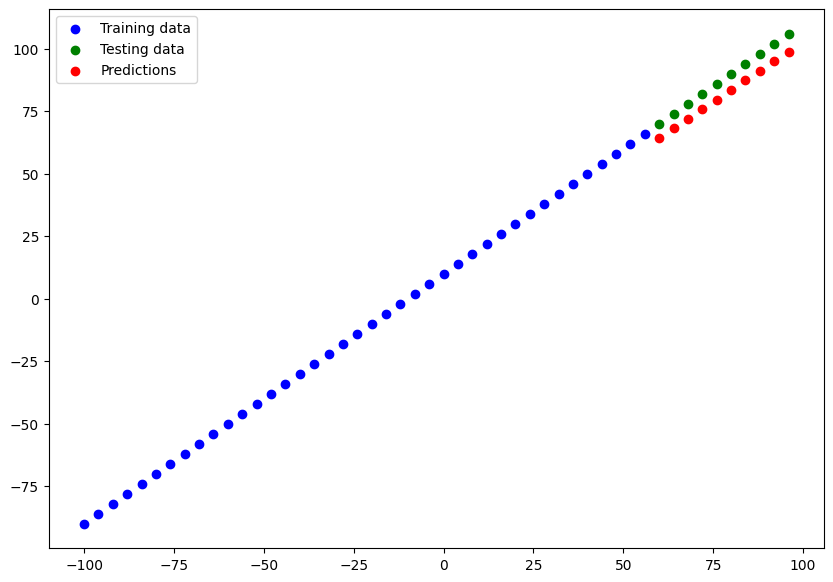

In [86]:
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [91]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# 3. Fit the model
model_6.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 18.0257 - mae: 18.0257
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 17.9441 - mae: 17.9441
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 17.8660 - mae: 17.8660
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 17.7856 - mae: 17.7856
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 17.7063 - mae: 17.7063
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 17.6275 - mae: 17.6275
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 17.5465 - mae: 17.5465
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 17.4641 - mae: 17.4641
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 17.3852 - mae: 17.3852
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 17.3073 - mae: 17.3073
Epoch 11/100
2/2 [==============================]

1/1 [==============================] - 0s 45ms/step


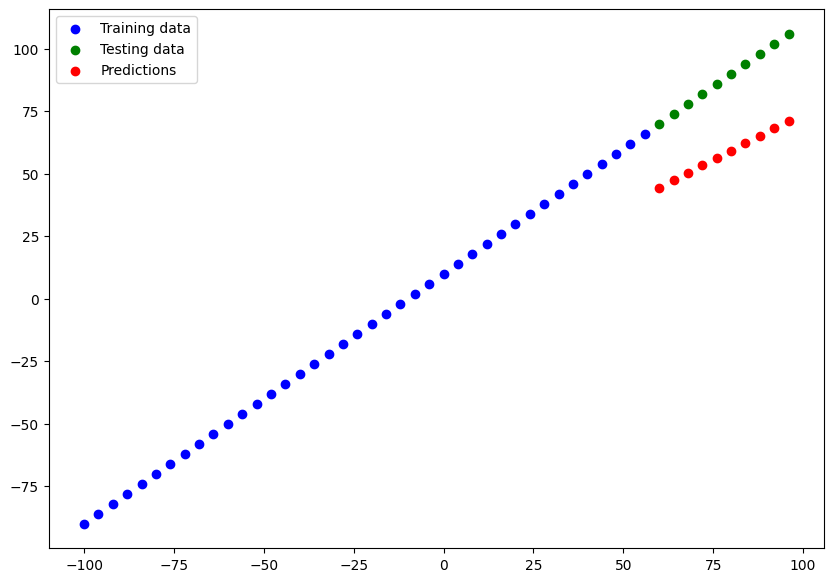

In [92]:
y_preds_6 = model_6.predict(X_test)
plot_predictions(predictions=y_preds_6)

One reallt good habin in machine learning modelling is to track the results of you experiments.
And when doing so, it cna be tedious if you're running lots of experiments.
Luckily, there are tools to help us!

**Resource**: As you build more models, you'll want to look into using
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plug sttaight into TensorBoard).